In [56]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks
import numpy as np

In [57]:
# ==== CONFIGURAÇÕES ====
CSV_FILE = "SensorData10_11_09_06_59.csv"
X_INTERVALO = 2     # intervalo dos ticks do eixo X (s)
DISTANCIA_MINIMA = 20  # mínimo de pontos entre vales
# =======================

In [58]:
# Lê o CSV
df = pd.read_csv(CSV_FILE)

# Converte a coluna Timestamp para datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Cria uma nova coluna de tempo relativo em segundos
df['Tempo_s'] = (df['Timestamp'] - df['Timestamp'].iloc[0]).dt.total_seconds()
df.head()

# Extrai eixos
xAxis = df['Tempo_s'].values
yAxis = df['Dado'].values

media = df['Dado'].mean()
max_data = df['Dado'].max()
min_data = df['Dado'].min()

In [59]:
# --- DETECÇÃO DE PICOS NEGATIVOS (VALES) ---
# Inverte o sinal para achar vales
vales, _ = find_peaks(-yAxis, distance=DISTANCIA_MINIMA)

# Se houver vales suficientes
if len(vales) > 1:
    # Calcula tempo entre vales consecutivos
    periodos = np.diff(xAxis[vales])
    periodo_medio = np.mean(periodos)
    frequencia_hz = 1 / periodo_medio if periodo_medio > 0 else 0
    duracao_total = xAxis[-1] - xAxis[0]
    
    print(f"🔹 Número de picos negativos (vales) detectados: {len(vales)}")
    print(f"🔹 Período médio entre vales: {periodo_medio:.4f} s")
    print(f"🔹 Frequência aproximada: {frequencia_hz:.2f} Hz")
    print(f"🔹 Duração total do sinal: {duracao_total:.2f} s")

else:
    print("⚠️ Não foram detectados vales suficientes para calcular a frequência.")

🔹 Número de picos negativos (vales) detectados: 14
🔹 Período médio entre vales: 0.7277 s
🔹 Frequência aproximada: 1.37 Hz
🔹 Duração total do sinal: 10.00 s


media: 17.515112474437625
max: 18.49
min: 16.74


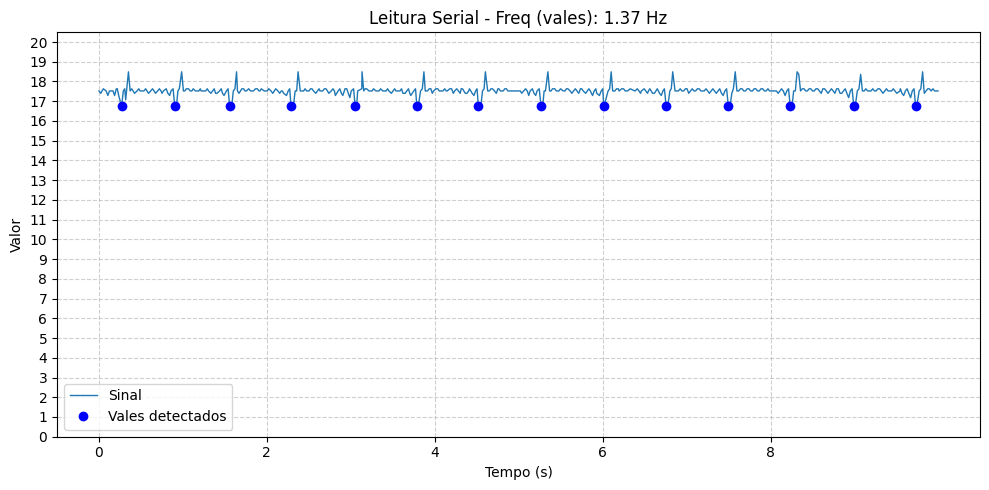

In [60]:

print('media: '+ str(media))
print('max: '+ str(max_data))
print('min: '+ str(min_data))

# --- GRÁFICO ---
plt.figure(figsize=(10, 5))
plt.plot(xAxis, yAxis, linewidth=1, label="Sinal")
plt.plot(xAxis[vales], yAxis[vales], "bo", label="Vales detectados")  # 🔵 marca os picos negativos

# Limites e escala do eixo Y
max_value = df['Dado'].max()
plt.ylim(bottom=0, top=max_value + 2)
plt.yticks(range(0, int(max_value) + 3, 1))

# Escala do eixo X
plt.xticks(range(0, int(xAxis[-1]) + 1, X_INTERVALO))

plt.xlabel("Tempo (s)")
plt.ylabel("Valor")
plt.title(f"Leitura Serial - Freq (vales): {frequencia_hz:.2f} Hz")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
